<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px" />

# # Project 3 : Web API and NLP

## Overview
For project 3, your goal is two-fold:

Using Pushshift's API, you'll collect posts from two subreddits of your choosing.
You'll then use NLP to train a classifier on which subreddit a given post came from. This is a binary classification problem.
About the API
Pushshift's API is fairly straightforward. For example, if I want the posts from /r/boardgames, all I have to do is use the following url: https://api.pushshift.io/reddit/search/submission?subreddit=boardgames

To help you get started, we have a primer video on how to use the API: https://youtu.be/AcrjEWsMi_E

In [131]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

import time

In [34]:
# call only one url   
url='https://api.pushshift.io/reddit/search/submission'

params = {'subreddit': 'boardgames',
          'size' : 500,
          'before' : 1616990918
#           1616993014 - df5
#           1616994014 - df4
#           1616994070 - df3
         }
# requests.get(url, params)

In [35]:
#in debug dont run this code
push_res1 = requests1.get(url, params)

In [36]:
push_res1.status_code

200

In [37]:
push_json1 = push_res1.json()
push_json1.keys

<function dict.keys>

In [38]:
posts1 = push_json1['data']
len(posts1)

100

In [39]:
posts1[0]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': 'PowFil',
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_text': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_2udpxvb3',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1616990842,
 'domain': 'self.boardgames',
 'full_link': 'https://www.reddit.com/r/boardgames/comments/mfhcjx/for_whomever_wants_to_play_tichu_in_a_high_level/',
 'gildings': {},
 'id': 'mfhcjx',
 'is_crosspostable': False,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': False,
 'is_robot_indexable': False,
 'is_self': True,
 'is_video': False,
 'link_flair_background_color': '',
 'link_flair_richtext': [],
 'link_flair_text_color': 'dark',
 'link_flair_type': 'text',
 'locked': False,
 'media_only': False,
 'no_follow': True,
 'num_comments': 0,
 'num_crossposts': 0,
 'over_18': False,
 'parent_

In [40]:
# df1 = pd.DataFrame(posts1)
# df3 = pd.DataFrame(posts1)
# df4 = pd.DataFrame(posts1)
# df5 = pd.DataFrame(posts1)
df6 = pd.DataFrame(posts1)

In [44]:
#boardgames - df1, df3, df4, df5, df6

(100, 81)

In [12]:
df1.shape

(100, 81)

df1 - 100 X 75

columns: Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext', 'author_flair_text',
       'author_flair_type', 'author_fullname', 'author_patreon_flair',
       'author_premium', 'awarders', 'can_mod_post', 'contest_mode',
       'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_css_class',
       'link_flair_richtext', 'link_flair_template_id', 'link_flair_text',
       'link_flair_text_color', 'link_flair_type', 'locked', 'media_only',
       'no_follow', 'num_comments', 'num_crossposts', 'over_18',
       'parent_whitelist_status', 'permalink', 'pinned', 'pwls',
       'removed_by_category', 'retrieved_on', 'score', 'selftext',
       'send_replies', 'spoiler', 'stickied', 'subreddit', 'subreddit_id',
       'subreddit_subscribers', 'subreddit_type', 'thumbnail', 'title',
       'total_awards_received', 'treatment_tags', 'upvote_ratio', 'url',
       'whitelist_status', 'wls', 'post_hint', 'preview', 'thumbnail_height',
       'thumbnail_width', 'url_overridden_by_dest', 'media', 'media_embed',
       'secure_media', 'secure_media_embed', 'author_flair_background_color',
       'author_flair_template_id', 'author_flair_text_color',
       'crosspost_parent', 'crosspost_parent_list'],
      dtype='object')
      
      author_flair_text_color, author_flair_template_id', link_flair_css_class'
      
      
      Index(['all_awardings', 'allow_live_comments', 'author',
       'author_flair_css_class', 'author_flair_richtext',
       'author_flair_template_id', 'author_flair_text',
       'author_flair_text_color', 'author_flair_type', 'author_fullname',
       'author_patreon_flair', 'author_premium', 'awarders', 'can_mod_post',
       'contest_mode', 'created_utc', 'domain', 'full_link', 'gildings', 'id',
       'is_crosspostable', 'is_meta', 'is_original_content',
       'is_reddit_media_domain', 'is_robot_indexable', 'is_self', 'is_video',
       'link_flair_background_color', 'link_flair_richtext',
       'link_flair_template_id', 'link_flair_text', 'link_flair_text_color',
       'link_flair_type', 'locked', 'media_only', 'no_follow', 'num_comments',
       'num_crossposts', 'over_18', 'parent_whitelist_status', 'permalink',
       'pinned', 'post_hint', 'preview', 'pwls', 'retrieved_on', 'score',
       'selftext', 'send_replies', 'spoiler', 'stickied', 'subreddit',
       'subreddit_id', 'subreddit_subscribers', 'subreddit_type', 'thumbnail',
       'thumbnail_height', 'thumbnail_width', 'title', 'total_awards_received',
       'treatment_tags', 'upvote_ratio', 'url', 'url_overridden_by_dest',
       'whitelist_status', 'wls', 'removed_by_category',
       'author_flair_background_color', 'media', 'media_embed', 'secure_media',
       'secure_media_embed', 'poll_data'],

In [85]:
df1 = df1[['subreddit', 'selftext', 'title']]
df3 = df3[['subreddit', 'selftext', 'title']]
df4 = df4[['subreddit', 'selftext', 'title']]
df5 = df6[['subreddit', 'selftext', 'title']]
df6 = df6[['subreddit', 'selftext', 'title']]

### For second dataset

In [77]:
# call only one url
url='https://api.pushshift.io/reddit/search/submission'

params = {'subreddit': 'RocketLeague',
          'size' : 500,
          'before' : 1616995470
#           1616995474 - df9
#           1616996022 - df8
#           1616996109 - df7
         }

In [78]:
push_res2 = requests.get(url, params)

In [79]:
push_res2.status_code

200

In [80]:
push_json2 = push_res2.json()
push_json2.keys()

dict_keys(['data'])

In [81]:
posts2 = push_json2['data']

In [82]:
# df2 = pd.DataFrame(posts2)
# df7 = pd.DataFrame(posts2)
# df8 = pd.DataFrame(posts2)
# df9 = pd.DataFrame(posts2)
df10 = pd.DataFrame(posts2)


In [83]:
df10.shape

(100, 76)

In [84]:
posts2[0]

{'all_awardings': [],
 'allow_live_comments': False,
 'author': 'BagsOfDust',
 'author_flair_css_class': None,
 'author_flair_richtext': [],
 'author_flair_text': None,
 'author_flair_type': 'text',
 'author_fullname': 't2_13jkrn',
 'author_patreon_flair': False,
 'author_premium': False,
 'awarders': [],
 'can_mod_post': False,
 'contest_mode': False,
 'created_utc': 1616995323,
 'domain': '/r/RocketLeague/comments/mfiex2/my_first_airdribble_pinch/',
 'full_link': 'https://www.reddit.com/r/RocketLeague/comments/mfiex2/my_first_airdribble_pinch/',
 'gildings': {},
 'id': 'mfiex2',
 'is_crosspostable': True,
 'is_meta': False,
 'is_original_content': False,
 'is_reddit_media_domain': False,
 'is_robot_indexable': True,
 'is_self': False,
 'is_video': True,
 'link_flair_background_color': '#838d94',
 'link_flair_richtext': [{'a': ':Highlight:',
   'e': 'emoji',
   'u': 'https://emoji.redditmedia.com/j4p5p2nv4qf61_t5_30cz1/Highlight'},
  {'e': 'text', 't': ' HIGHLIGHT'}],
 'link_flair_tem

In [86]:
df2 = df2[['subreddit', 'selftext', 'title']]
df7 = df7[['subreddit', 'selftext', 'title']]
df8 = df8[['subreddit', 'selftext', 'title']]
df9 = df9[['subreddit', 'selftext', 'title']]
df10 = df10[['subreddit', 'selftext', 'title']]

In [95]:
df11 = pd.concat([df11, df10], join="outer")

In [96]:
df11.shape

(1000, 3)

In [100]:
df11.to_csv('reddit1000.csv')

## Part2: Run from here

In [101]:
df = df11.copy()

In [102]:
df.describe().T

,count,unique,top,freq
subreddit,1000,2,boardgames,500
selftext,1000,102,,414
title,1000,208,[COMC] It all started with Legends of Andor...,5


## Part3: Modeling

Please refer to Ames Presentation.pdf for the final presentation.


In [103]:
from sklearn.naive_bayes import BernoulliNB

In [104]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

X = df['selftext']
y = df['subreddit']
cvec = CountVectorizer(stop_words='english', 
                       ngram_range=(2,2),
                       min_df=2
                      )

In [105]:
cvec.fit(X)

trans_x = cvec.transform(X)

trans_df = pd.DataFrame(trans_x.todense(), columns = cvec.get_feature_names())

In [106]:
trans_df.sum().sort_values(ascending=False).head(15)


https www              750
com projects           700
ref kicktraq           645
kickstarter com        500
www kickstarter        500
boardgamegeek com      355
https boardgamegeek    350
com boardgame          345
000 far                270
bgg https              265
card game              215
www kicktraq           205
kicktraq com           205
kicktraq https         200
kicktraq bgg           145
dtype: int64

In [107]:
trans_df.shape

(1000, 7159)

In [108]:
from sklearn.linear_model import LogisticRegression

In [109]:
y.value_counts()

boardgames      500
RocketLeague    500
Name: subreddit, dtype: int64

In [121]:

X = df['selftext']
y = df['subreddit']

X_train, X_test, y_train, y_test=train_test_split(X,
                                                 y,
                                                 test_size=.25,
                                                 stratify=y,
                                                 random_state=42)
  

In [111]:
cvec.fit(X_train)
X_train = cvec.transform(X_train)

In [112]:
X_test = cvec.transform(X_test)

In [113]:
y_test.value_counts()

boardgames      125
RocketLeague    125
Name: subreddit, dtype: int64

In [122]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB

pipe = Pipeline([
    ('tvec', TfidfVectorizer()),
    ('nb', MultinomialNB())
])

pipe_tvec_params = {
    'tvec__max_features':[2_000, 3_000, 4_000, 5_000],
    'tvec__stop_words':[None, 'english'],
    'tvec__ngram_range':[(1,1), (1,2)]
}

In [123]:
gs_tvec = GridSearchCV(pipe, param_grid = pipe_tvec_params, 
         cv=5)

In [124]:
X_train

21    I got an old fashioned, super sturdy folding t...
99    Are there any good boosts out there that are p...
61                                                     
40                                                     
96                                            [deleted]
                            ...                        
59                                                     
39                                                     
4                                             [removed]
37                                                     
53    So we’re having an extra guest today at my hou...
Name: selftext, Length: 750, dtype: object

In [125]:
gs_tvec

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [126]:
gs_tvec.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('tvec', TfidfVectorizer()),
                                       ('nb', MultinomialNB())]),
             param_grid={'tvec__max_features': [2000, 3000, 4000, 5000],
                         'tvec__ngram_range': [(1, 1), (1, 2)],
                         'tvec__stop_words': [None, 'english']})

In [127]:
gs_tvec.score(X_train, y_train)

0.8146666666666667

In [128]:
# Get predictions
preds_tvec=gs_tvec.predict(X_test)

# Save confusion matrix values
cm = confusion_matrix(y_test, preds_tvec)


In [129]:
tn, fp, fn, tp = cm.ravel()
# Calculate the specificity
spec = tn/(tn+fp)#fp = 0 spam pred 0 as fp, fn =34
spec

1.0

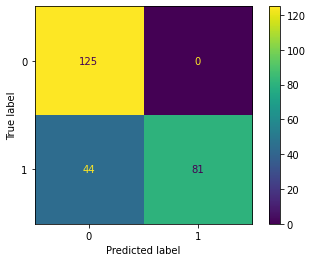

In [130]:
ConfusionMatrixDisplay(cm).plot();